# BrainStation
#### Project: Natural language processing (NLP) Hotel Review
#### Author: Cristhian Lima
#### Date: Oct 2024

## Table of Contents
---
1. [Project Overview](#introduction)
2. [Data Set and SetUp](#dataset)
    - [Data Dictionary](#datadict)
    - [Importing Libraries](#lib)
    - [Importing the Dataset](#importdataset)
3. [Exploratory Data Analysis (EDA)](#cleaning)
    - [Distribution of target variable](#distribution)
    - [Distributions of numeric attributes](#numdist)
    - [Average_Score analysis for each hotel](#avgscore)
    - [Nights stayed at hotels analysis](#night)
5. [Preprocessing](#preprocessing)
    - [Text Cleaning and Tokenization](#textclean)
    - [Split data into Train and Test](#splitdata)
7. [Modelling](#model)
    - [Logistic Regression](#logreg)
    - [Top 20 words from the positive and negative reviews that are most predictive](#topwords)
    - [Pipeline, combine PCA with a decision tree classifier](#pipe)
    - [Confusion matrix](#confmatrix)
9. [Findings Summary](#findings)

# 1. Project Overview <a class="anchor" id="introduction"></a>

In this project, we aim to help Hotel Management Inc. better understand the factors that contribute to customer satisfaction and higher ratings through an analysis of hotel reviews.

Using a dataset consisting of both positive and negative customer comments along with other details about each stay (e.g., location, length of stay), we predict customer satisfaction based on the Reviewer_Score, where a higher score indicates a more positive experience.

# 2. Data Set and SetUp <a class="anchor" id="dataset"></a>

### Data Dictionary <a class="anchor" id="datadict"></a>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Additional_Number_of_Scoring</td>
      <td>The number of additional scores provided by the reviewer.</td>
    </tr>
    <tr>
      <td>Average_Score</td>
      <td>The average score the hotel received over time.</td>
    </tr>
    <tr>
      <td>Negative_Review</td>
      <td>The text of the negative review provided by the customer.</td>
    </tr>
    <tr>
      <td>Review_Total_Negative_Word_Counts</td>
      <td>The total number of words in the negative review.</td>
    </tr>
    <tr>
      <td>Total_Number_of_Reviews</td>
      <td>The total number of reviews the hotel has received.</td>
    </tr>
    <tr>
      <td>Positive_Review</td>
      <td>The text of the positive review provided by the customer.</td>
    </tr>
    <tr>
      <td>Review_Total_Positive_Word_Counts</td>
      <td>The total number of words in the positive review.</td>
    </tr>
    <tr>
      <td>Total_Number_of_Reviews_Reviewer_Has_Given</td>
      <td>The total number of reviews given by the reviewer.</td>
    </tr>
    <tr>
      <td>Reviewer_Score</td>
      <td>The score given by the reviewer, where 1 indicates positive sentiment and 0 indicates negative sentiment.</td>
    </tr>
    <tr>
      <td>Days_Since_Review</td>
      <td>The number of days since the review was posted.</td>
    </tr>
    <tr>
      <td>Latitude</td>
      <td>Latitude of the hotel's location.</td>
    </tr>
    <tr>
      <td>Longitude</td>
      <td>Longitude of the hotel's location.</td>
    </tr>
    <tr>
      <td>Day</td>
      <td>The day the review was posted.</td>
    </tr>
    <tr>
      <td>Month</td>
      <td>The month the review was posted.</td>
    </tr>
    <tr>
      <td>Year</td>
      <td>The year the review was posted.</td>
    </tr>
    <tr>
      <td>Reviewer_Nationality_Australia</td>
      <td>Binary: 1 if the reviewer is from Australia, 0 if not.</td>
    </tr>
    <tr>
      <td>Reviewer_Nationality_Ireland</td>
      <td>Binary: 1 if the reviewer is from Ireland, 0 if not.</td>
    </tr>
    <tr>
      <td>Reviewer_Nationality_UAE</td>
      <td>Binary: 1 if the reviewer is from the UAE, 0 if not.</td>
    </tr>
    <tr>
      <td>Reviewer_Nationality_UK</td>
      <td>Binary: 1 if the reviewer is from the UK, 0 if not.</td>
    </tr>
    <tr>
      <td>Reviewer_Nationality_USA</td>
      <td>Binary: 1 if the reviewer is from the USA, 0 if not.</td>
    </tr>
    <tr>
      <td>Reviewer_Nationality_Other</td>
      <td>Binary: 1 if the reviewer is from any country other than the ones explicitly listed, 0 if not.</td>
    </tr>
    <tr>
      <td>Hotel_Address_Amsterdam</td>
      <td>Binary: 1 if the hotel is located in Amsterdam, 0 if not.</td>
    </tr>
    <tr>
      <td>Hotel_Address_Barcelona</td>
      <td>Binary: 1 if the hotel is located in Barcelona, 0 if not.</td>
    </tr>
    <tr>
      <td>Hotel_Address_London</td>
      <td>Binary: 1 if the hotel is located in London, 0 if not.</td>
    </tr>
    <tr>
      <td>Hotel_Address_Milan</td>
      <td>Binary: 1 if the hotel is located in Milan, 0 if not.</td>
    </tr>
    <tr>
      <td>Hotel_Address_Paris</td>
      <td>Binary: 1 if the hotel is located in Paris, 0 if not.</td>
    </tr>
    <tr>
      <td>Hotel_Address_Vienna</td>
      <td>Binary: 1 if the hotel is located in Vienna, 0 if not.</td>
    </tr>
    <tr>
      <td>Leisure_Trip</td>
      <td>Binary: 1 if the trip was a leisure trip, 0 if not.</td>
    </tr>
    <tr>
      <td>Nights_Stayed</td>
      <td>The number of nights the reviewer stayed at the hotel.</td>
    </tr>
  </tbody>
</table>


## Importing Libraries <a class="anchor" id="lib"></a>
Importing all the libraries we are going to use in this project:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')  # Tokenizer
nltk.download('stopwords')  # Stop words
nltk.download('wordnet')  # Lemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Importing the Dataset <a class="anchor" id="importdataset"></a>

In [4]:
## Importing the dataset
df = pd.read_csv('Hotel_Reviews.csv')

In [ ]:
# Looking at the first observations in the dataset
df.head()

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,...,0,1,1,0,0,0,0,0,1,6
1,1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,...,0,0,1,0,0,0,0,0,1,4
2,2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,...,0,0,1,0,0,0,0,0,1,3
3,3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,...,0,0,1,0,0,0,0,0,1,3
4,4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,...,0,1,1,0,0,0,0,0,1,2


# 3. Exploratory Data Analysis (EDA) <a class="anchor" id="cleaning"></a>

### a. Distribution of the target variable (Reviewer_Score): <a class="anchor" id="distribution"></a>

In [ ]:
## Exploring the distribution of the Review Scores:
rev_count = df['Reviewer_Score'].value_counts()  ## Count values of positive and negative reviews
rev_perc = np.round((df['Reviewer_Score'].value_counts(normalize=True)*100),4)  ## Count values of positive and negative reviews as percentage

## Summary of Positive and Negative Reviews
rev_summ = pd.DataFrame({'Count':rev_count, '%':rev_perc}) ## Creating a DataFrame using counts values
print(rev_summ)

                 Count        %
Reviewer_Score                 
1               293974  57.0006
0               221764  42.9994


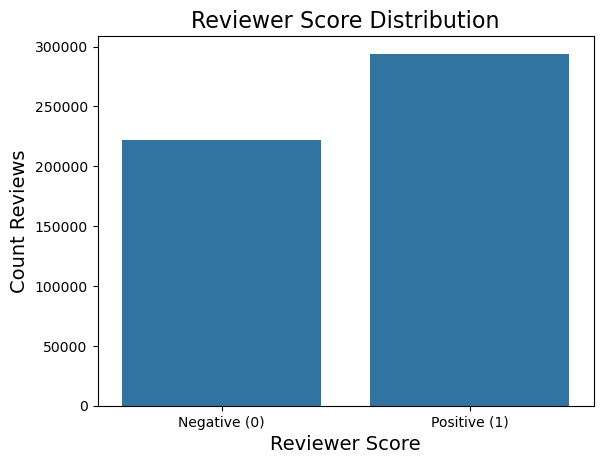

In [ ]:
count_rev = df['Reviewer_Score'].value_counts()

sns.barplot(count_rev)
plt.title('Reviewer Score Distribution', fontsize=16)
plt.xlabel('Reviewer Score', fontsize=14)
plt.ylabel('Count Reviews', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (1)'])
plt.show()

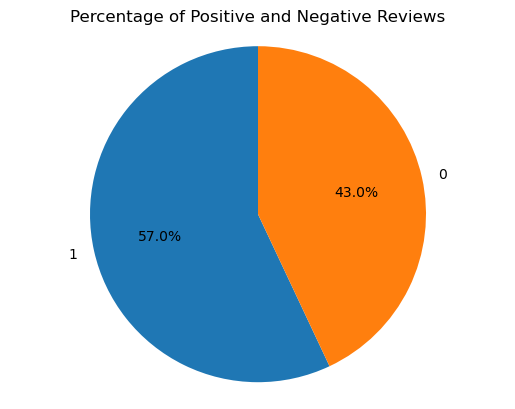

In [ ]:
# Percentahe of positive and negative reviews
plt.pie(rev_summ['%'], labels=rev_summ.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Positive and Negative Reviews')
plt.axis('equal')
plt.show()

As we can see, there are 293,974 positive reviews, representing 57% of the total, while the 221,764 negative reviews account for 42%. Although the positive reviews outnumber the negative ones, the significant volume of negative feedback indicates a need for action to prevent it from becoming the dominant sentiment, which could harm the business and drive customers away.

### b. Distributions of numeric attributes <a class="anchor" id="numdist"></a>

Histograms for variables: Average_Score, Review_Total_Negative_Word_Counts, Review_Total_Positive_Word_Counts

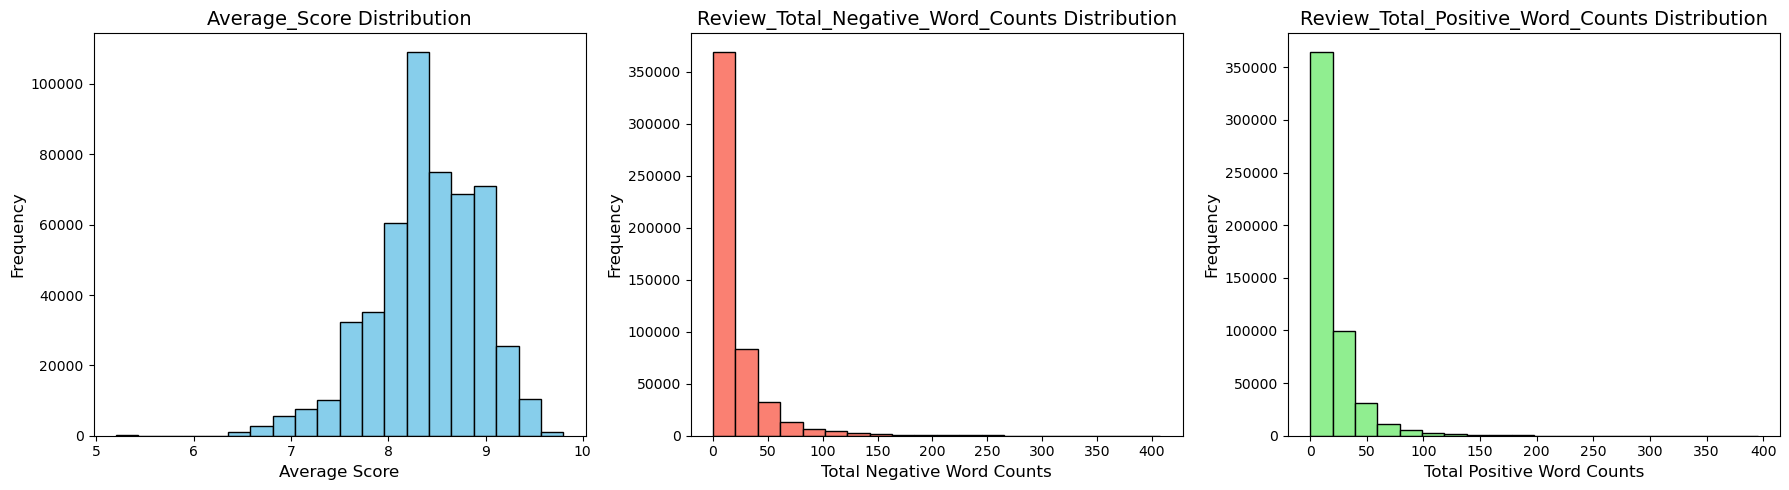

In [ ]:
# Histograms for selected variables
plt.figure(figsize=(18, 5))

# Histogram for Average_Score
plt.subplot(1, 3, 1)  # Subplot 1
plt.hist(df['Average_Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Average_Score Distribution', fontsize=14)
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Histogram for Review_Total_Negative_Word_Counts
plt.subplot(1, 3, 2)  # Subplot 2
plt.hist(df['Review_Total_Negative_Word_Counts'], bins=20, color='salmon', edgecolor='black')
plt.title('Review_Total_Negative_Word_Counts Distribution', fontsize=14)
plt.xlabel('Total Negative Word Counts', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Histogram for Review_Total_Positive_Word_Counts
plt.subplot(1, 3, 3)  # Subplot 3
plt.hist(df['Review_Total_Positive_Word_Counts'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Review_Total_Positive_Word_Counts Distribution', fontsize=14)
plt.xlabel('Total Positive Word Counts', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()  # Fixing space between plots
plt.show()

### Distribution Analysis:

1. Average_Score Distribution:
   - Most hotels have an average score between 7 and 9. This suggests that most guests are relatively satisfied with their stays, as scores below 7 are less common.
2. Review_Total_Positive_Word_Counts Distribution:
   - The vast majority of negative reviews contain less than 50 words, suggesting that customers tend to be shorter when expressing negative comments.
   - This graph is heavily skewed to the right, meaning that most customers use few words to describe what they didn't like.
3. Review_Total_Positive_Word_Counts Distribution:
   - Similar to the negative reviews graph, the majority of positive reviews are less than 50 words, indicating that customers tend to be brief when expressing positive feedback as well.
   - Like negative reviews, positive reviews are also skewed to the right, indicating that wordy reviews are less common.


**Insights:**

**Satisfied customers:** Most customers seem to be satisfied with their stay, as the average reviews tend to fall within a high range.

**Brevity in comments:** Both negative and positive comments are mostly short. This may indicate that customers tend to write concise reviews, regardless of whether the experience was positive or negative.

**Greater tendency to elaborate in positive reviews:** There is a slight tendency to use more words in positive comments than in negative ones, which could suggest that customers are more expressive when they have a good experience.

### c. Average_Score analysis for each hotel <a class="anchor" id="avgscore"></a>

In [ ]:
# calculating the average Average_Score for each hotel
average_by_hotel = {
    'Amsterdam': df.loc[df['Hotel_Address_Amsterdam'] == 1, 'Average_Score'].unique()[0],
    'Barcelona': df.loc[df['Hotel_Address_Barcelona'] == 1, 'Average_Score'].unique()[0],
    'London': df.loc[df['Hotel_Address_London'] == 1, 'Average_Score'].unique()[0],
    'Milan': df.loc[df['Hotel_Address_Milan'] == 1, 'Average_Score'].unique()[0],
    'Paris': df.loc[df['Hotel_Address_Paris'] == 1, 'Average_Score'].unique()[0],
    'Vienna': df.loc[df['Hotel_Address_Vienna'] == 1, 'Average_Score'].unique()[0]
}

# Dictionary into DataFrame
average_by_hotel_df = pd.DataFrame(list(average_by_hotel.items()), columns=['Hotel', 'Average_Score'])
print(average_by_hotel_df)

       Hotel  Average_Score
0  Amsterdam            7.7
1  Barcelona            7.8
2     London            8.5
3      Milan            8.9
4      Paris            8.4
5     Vienna            8.1


C:\Users\Cris\AppData\Local\Temp\ipykernel_15316\1111739589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hotel', y='Average_Score', data=average_by_hotel_df, palette='Blues_d')


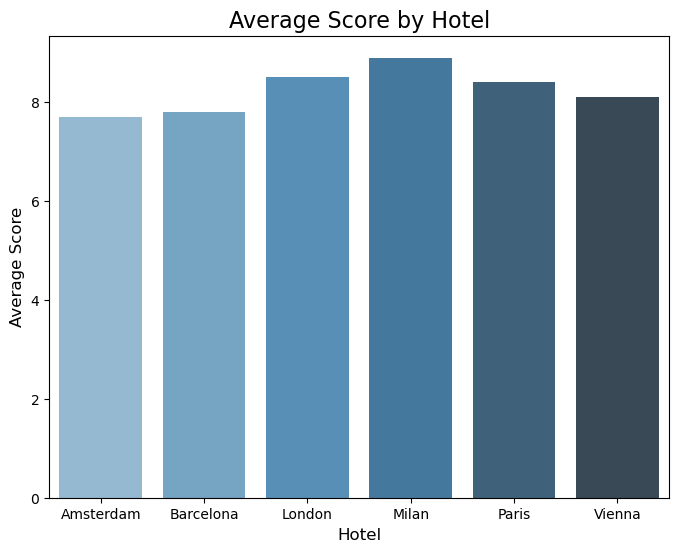

In [ ]:
# Average Score Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Hotel', y='Average_Score', data=average_by_hotel_df, palette='Blues_d')
plt.title('Average Score by Hotel', fontsize=16)
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.show()

As we can see, all hotels have an Average Score greater than 7.
Milan is the one that stands out the most with an average score of 8.9. The lowest score is for Amsterdam with 7.7, however it is a score that continues to be positive.

### d. Nights Stayed at Hotels Analysis <a class="anchor" id="night"></a>

In [ ]:
## Total Nights stayed at hotels
stayed_nights = df['Nights_Stayed'].describe()
print(stayed_nights)

count    515738.000000
mean          2.362122
std           1.646808
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          31.000000
Name: Nights_Stayed, dtype: float64


As we can see regarding Nights_Stayed, in average a guest stay 2 nights, minimum 1 and maximum of nights stayed in the hotel 31.

However, in the following table and graphs, we can see how stays longer than 7 days are not common.

In [ ]:
# Count the occurrences of unique values in 'Nights_Stayed' column
# Grouping the values into 5 ranges and normalizing to get the percentage
df['Nights_Stayed'].value_counts(bins= 5, normalize=True)*100

(0.969, 7.0]    98.777286
(7.0, 13.0]      1.098232
(13.0, 19.0]     0.101796
(19.0, 25.0]     0.014542
(25.0, 31.0]     0.008144
Name: proportion, dtype: float64

The majority of guests stay for less than 7 days, making up 98% of the total. The remaining guests, who stay for more than 7 days, account for less than 2%.

Text(0, 0.5, 'Frequency')

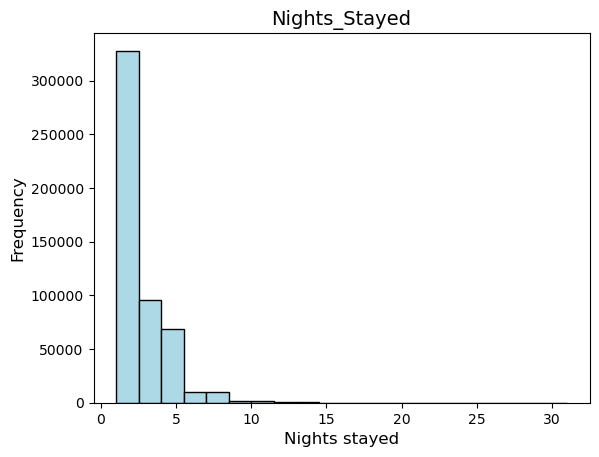

In [ ]:
# Histogram for Review_Total_Positive_Word_Counts
plt.hist(df['Nights_Stayed'], bins=20, color='lightblue', edgecolor='black')
plt.title('Nights_Stayed', fontsize=14)
plt.xlabel('Nights stayed', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

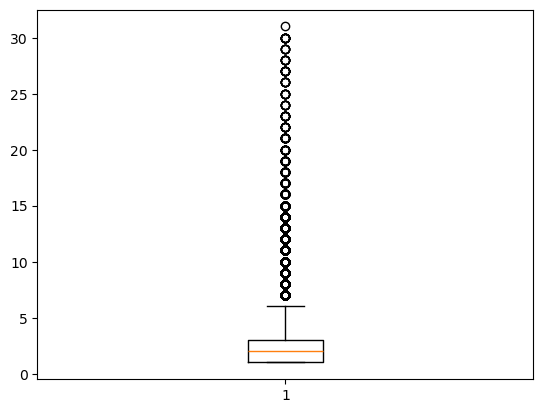

In [ ]:
# Creating plot to see the outliers in nights stayed
plt.boxplot(df['Nights_Stayed'])
plt.show()

This graph is heavily skewed to the left, meaning that most customers stay less than 7 days. The rest of the days is not represntative.

# 4. Preprocessing <a class="anchor" id="preprocessing"></a>

Next, the text data needs to be processed for modelling, spliting the data into train and test sets and transform the positive and negative review columns using a CountVectorizer.

We will be following the next steps:

1. **Clean the text:** Perform tokenization and cleaning of the text columns (positive and negative comments).
2. **Apply CountVectorizer:** Convert texts into word count arrays. We limit it to 500 features and eliminate words that appear less than 10 times.
3. **Split into training and test sets:** Separate data for training and evaluation.

## Text Cleaning and Tokenization <a class="anchor" id="textclean"></a>

Before we can perform our analysis, we need to preprocess the text data, first we need to apply text cleaning techniques like lower-case the text, remove stopwords and then tokenize it into individual words. This step helps in standardizing the text data.

In [5]:
# Convert the text in 'Positive_Review' and 'Negative_Review' column to lowercase
# Both lines ensure that the text is uniformly in lowercase for further text processing or analysis
df['Positive_Review'] = df['Positive_Review'].str.lower()
df['Negative_Review'] = df['Negative_Review'].str.lower()

In [6]:
# Tokenize each review in 'Positive_Review' and 'Negative_Review' column using nltk word_tokenize function
# This function tokenizes the text, splitting each review into individual words or tokens. It handles punctuation and spacing intelligently
df['Positive_Review'] = df['Positive_Review'].apply(nltk.word_tokenize)
df['Negative_Review'] = df['Negative_Review'].apply(nltk.word_tokenize)

In [7]:
# Remove stopwords after tokenizing
# Load the list of stopwords for the English language using NLTK
stopwords = nltk.corpus.stopwords.words('english')  # Predefined list of common English words (like "the", "and", "is") that usually is not useful.

# Remove stopwords from the tokenized 'Positive_Review' column
df['Positive_Review'] = df['Positive_Review'].apply(lambda x: [word for word in x if word not in stopwords])
df['Negative_Review'] = df['Negative_Review'].apply(lambda x: [word for word in x if word not in stopwords])
# lambda x: [word for word in x if word not in stopwords] : This is a list comprehension that loops over each token (word) in the tokenized review (x) and removes the word if it is found in the list of stopwords

In [8]:
# Applying lemmatizer which is used to reduce words to the root form
lemmatizer = WordNetLemmatizer() # Initialize the WordNet lemmatizer from NLTK

# Apply lemmatization to the 'Positive_Review' column
df['Positive_Review'] = df['Positive_Review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['Negative_Review'] = df['Negative_Review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
# lambda x: [lemmatizer.lemmatize(word) for word in x] : This is a list comprehension that loops through each token in the review and applies the lemmatize method to return the base form of each word.


For now we have carried out a cleanup of the positive and negative reviews, executing the following:

- Convert text to lowercase
- Tokenizing the text utilizing nltk
- Remove stopwords after tokenizing

Now we are ready to split the data into training and test sets. This step is important to ensure that the model is properly trained with unseen data.


### Split data into Train and Test <a class="anchor" id="splitdata"></a>

In [9]:
# Define the list of feature columns for the model (X columns)
xcols = ['Positive_Review', 'Negative_Review', 'Average_Score', 'Total_Number_of_Reviews',
         'Total_Number_of_Reviews_Reviewer_Has_Given', 'Days_Since_Review',
         'Reviewer_Nationality_Australia', 'Reviewer_Nationality_Ireland',
         'Reviewer_Nationality_UAE', 'Reviewer_Nationality_UK',
         'Reviewer_Nationality_USA', 'Reviewer_Nationality_Other',
         'Hotel_Address_Amsterdam', 'Hotel_Address_Barcelona',
         'Hotel_Address_London', 'Hotel_Address_Milan', 'Hotel_Address_Paris',
         'Hotel_Address_Vienna', 'Leisure_Trip', 'Nights_Stayed']

# Set the X variable with xcols columns
X = df[xcols]
# Set the target variable
y = df['Reviewer_Score']

# Split the dataset into training and testing sets
# 80% of the data will be used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing datasets
print(f"Train size: {X_train.shape}")
print(f"Test size: {X_test.shape}")

Train size: (412590, 20)
Test size: (103148, 20)


In [10]:
# Initialize the CountVectorizer for positive and negative comments

# Create a CountVectorizer for positive reviews with a maximum of 500 features (words) and ignore words that appear <10 times
vectorizer_pos = CountVectorizer(max_features=500, min_df=10)
vectorizer_neg = CountVectorizer(max_features=500, min_df=10)

In [11]:
# Convert reviews to strings again to apply vectorizer

# Convert the list of tokens in 'Positive_Review' and 'Negative_Review' back to a single string with words separated by spaces for training and testing datasets
X_train['Positive_Review'] = X_train['Positive_Review'].apply(lambda x: ' '.join(x))
X_train['Negative_Review'] = X_train['Negative_Review'].apply(lambda x: ' '.join(x))

X_test['Positive_Review'] = X_test['Positive_Review'].apply(lambda x: ' '.join(x))
X_test['Negative_Review'] = X_test['Negative_Review'].apply(lambda x: ' '.join(x))

# (' '.join(x)): This joins the list of words (x) into a single string, with each word separated by a space, suitable for vectorization.

In [12]:
# Applying vectorizer to positive reviews from the training and test set

# Fit the CountVectorizer on the positive reviews in the training set and transform them into a matrix of token counts (features)
X_train_pos = vectorizer_pos.fit_transform(X_train['Positive_Review']).toarray()
X_test_pos = vectorizer_pos.transform(X_test['Positive_Review']).toarray()

In [13]:
# Apply the vectorizer to negative reviews from the training and test set

# Fit the CountVectorizer on the negative reviews in the training set and transform them into a matrix of token counts (features)
X_train_neg = vectorizer_neg.fit_transform(X_train['Negative_Review']).toarray()
X_test_neg = vectorizer_neg.transform(X_test['Negative_Review']).toarray()

In [14]:
# Adding 'pos' and 'neg' prefixes to feature names
# Create a list of feature names for positive and negative reviews by prefixing each word

# with 'pos_' to indicate that they are derived from positive reviews
pos_feature_names = ['pos_' + word for word in vectorizer_pos.get_feature_names_out()]

# with 'neg_' to indicate that they are derived from negative reviews
neg_feature_names = ['neg_' + word for word in vectorizer_neg.get_feature_names_out()]

In [15]:
# Combining all numerical features with text matrices

# Combine the numerical features and the reviews feature matrix
# First, drop the 'Positive_Review' and 'Negative_Review' columns, keeping only numerical features
# Then, horizontally stack (concatenate) these numerical features with the positive and negative text feature matrices

X_train_combined = np.hstack([X_train.drop(['Positive_Review', 'Negative_Review'], axis=1).values, X_train_pos, X_train_neg])
X_test_combined = np.hstack([X_test.drop(['Positive_Review', 'Negative_Review'], axis=1).values, X_test_pos, X_test_neg])

In [16]:
# Creating the final DataFrames with the appropriate feature columns

# Generate a list of feature for the final DataFrame
# Start with the numerical feature names from the training set (excluding text reviews)
final_columns = list(X_train.drop(['Positive_Review', 'Negative_Review'], axis=1).columns) + pos_feature_names + neg_feature_names

# Create the final DataFrame for the training set with the combined features
X_train_final_df = pd.DataFrame(X_train_combined, columns=final_columns)

# Similarly, create the final DataFrame for the test set with the combined features and assigned column names
X_test_final_df = pd.DataFrame(X_test_combined, columns=final_columns)

The resulting DataFrames, X_train_final_df and X_test_final_df, are now ready for training and testing the machine learning model, containing all relevant features in a structured format.

In [17]:
# Final shape verification
print(X_train_final_df.shape, X_test_final_df.shape)

(412590, 1018) (103148, 1018)


## **Explanation:**
**Combined Reviews:** Positive and negative reviews have been concatenated into a new column called Combined_Reviews.
**Vectorization:** CountVectorizer has been applied only to the combined column.
**Final combination:** The matrix resulting from the vectorized reviews is combined with the numerical characteristics.

(412590, 1018):
It is the number of rows and columns in the training dataset.


(103148, 1018):
It is the number of rows and columns in the test dataset.

# 3. Modelling <a class="anchor" id="model"></a>

## Logistic Regression <a class="anchor" id="logreg"></a>

Next, a logistic regression model will be trained, performance and accuracy will be evaluated, and the 20 most important words from both positive and negative reviews will be identified.

In [18]:
# Instantiate Logistic Model

logmodel = LogisticRegression(max_iter=1000, random_state=42) # Creating an instance of the Logistic Regression model with a maximum of 1000 iterations

# Fit the model with train dataset
# Training the logistic regression model using the training features and target variable
logmodel.fit(X_train_final_df, y_train)

# Predict
# Generating predictions for the training and testing dataset
y_train_pred = logmodel.predict(X_train_final_df)
y_test_pred = logmodel.predict(X_test_final_df)

# Model Accuracy
# Calculating the accuracy score of the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy results
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train accuracy: 0.7839
Test accuracy: 0.7827


After running the Logistic Model with 2 different it iterations, the accuracy is:

1000 Iterations:

*   Train accuracy: 0.78
*   Test accuracy: 0.77

5000 iterations:

*   Train accuracy: 0.79
*   Test accuracy: 0.79

We decided to limit the model to 1,000 iterations, as the accuracy does not vary significantly compared to 5,000 iterations. In terms of efficiency, the estimated execution time with 1,000 iterations is approximately 15 minutes, while with 5,000 iterations, it takes around 1 hour and 15 minutes. Since increasing the iterations does not substantially improve the model's performance, we consider 1,000 iterations to be a good trade-off between accuracy and execution time.



## Top 20 words from the positive and negative reviews that are most predictive <a class="anchor" id="topwords"></a>

In [19]:
## Obtaining the coefficients of the trained model
coefficients = logmodel.coef_[0]

# DataFrame with the coeficients
# Creating a DataFrame to organize the feature names and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': X_train_final_df.columns,'Coefficient': coefficients})

coef_df.head() # This will show the top 5 features along with their coefficients

,Feature,Coefficient
0,Average_Score,0.316257
1,Total_Number_of_Reviews,-0.000033
2,Total_Number_of_Reviews_Reviewer_Has_Given,-0.000210
3,Days_Since_Review,-0.000379
4,Reviewer_Nationality_Australia,-0.394097


In [20]:
# Sorting by coefficients (possitive words)

# Filtering the coefficients DataFrame to include only features that start with 'pos_'
# Sorting these features by their coefficients in descending order to find the top 20 positive words
top_pos_words = coef_df[coef_df['Feature'].str.startswith('pos_')].sort_values(by='Coefficient', ascending=False).head(20)

# Sorting by coefficients (negative words)

# Filtering the coefficients DataFrame to include only features that start with 'neg_'
# Sorting these features by their coefficients in ascending order to find the top 20 negative words
top_neg_words = coef_df[coef_df['Feature'].str.startswith('neg_')].sort_values(by='Coefficient', ascending=True).head(20)

As you can see, the main words that describe the positive or negative prediction for prediction based on the coefficient are:



In [21]:
# Printing the top 20 positive words and their coefficients
print("Top 20 positive words:")
print(top_pos_words)  # Displaying the DataFrame containing the top positive words and their corresponding coefficients

print("__________________________________")

# Printing the top 20 negative words and their coefficients
print("Top 20 negative words:") # Displaying the DataFrame containing the top negative words and their corresponding coefficients
print(top_neg_words)

Top 20 positive words:
            Feature  Coefficient
172  pos_everything     1.567059
34      pos_amazing     1.054626
340     pos_perfect     0.974402
188   pos_fantastic     0.854274
174   pos_excellent     0.730497
65    pos_beautiful     0.691298
280       pos_loved     0.668627
394     pos_service     0.633782
421       pos_staff     0.609592
510   pos_wonderful     0.584755
281      pos_lovely     0.475452
69         pos_best     0.459558
440      pos_superb     0.441961
439       pos_super     0.414679
185    pos_facility     0.408641
170       pos_every     0.401598
136  pos_definitely     0.400365
425        pos_stay     0.398880
81    pos_brilliant     0.393343
301      pos_modern     0.380186
__________________________________
Top 20 negative words:
               Feature  Coefficient
858           neg_poor    -0.912310
928          neg_staff    -0.840095
829            neg_old    -0.779222
931           neg_star    -0.636602
768       neg_location    -0.606054
642       

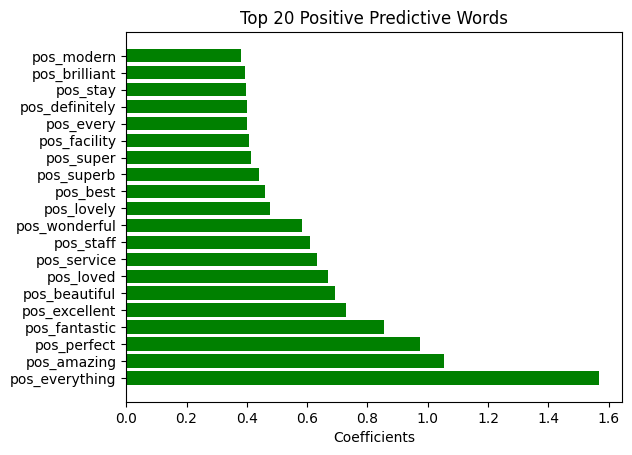

In [22]:
## Bar Graph displaying Top 20 positive words
plt.barh(top_pos_words['Feature'], top_pos_words['Coefficient'], color='green')
plt.xlabel('Coefficients')
plt.title('Top 20 Positive Predictive Words')
plt.show()

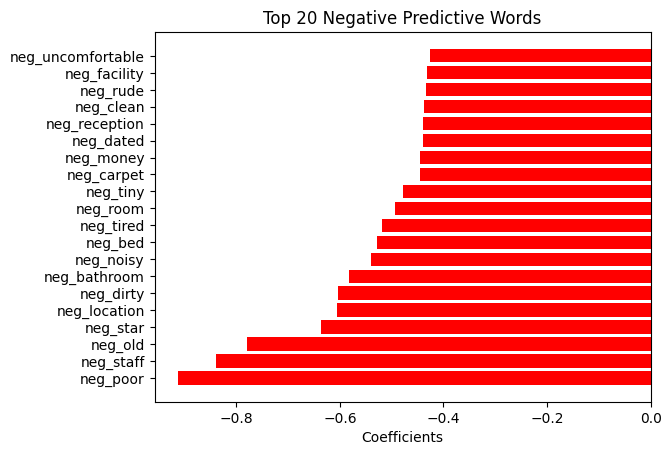

In [23]:
## Bar Graph displaying Top 20 negative words
plt.barh(top_neg_words['Feature'], top_neg_words['Coefficient'], color='red')
plt.xlabel('Coefficients')
plt.title('Top 20 Negative Predictive Words')
plt.show()

### Top Words Predictive of Positive Sentiment:
The top 20 most predictive words for positive reviews include terms like:

 - **Everything:** Customers often highlight that “everything” met or exceeded their expectations.
 - **Amazing, perfect, fantastic, excellent:** These words strongly suggest high satisfaction.
 - **Service, staff:** Customer interactions with staff and service are key contributors to positive experiences.
 - **Beautiful, wonderful, modern:** These words indicate that the hotel’s aesthetic appeal and modernity are highly valued by customers.

These words suggest that hotels that offer excellent service, friendly staff, and aesthetically pleasing or modern environments are more likely to receive positive feedback.

### Top Words Predictive of Negative Sentiment:
The top 20 words for negative reviews reveal common customer frustrations:

 - **Poor, dirty, old, dated:** These words point to dissatisfaction with the cleanliness, age, or upkeep of hotel facilities.
 - **Staff, rude, reception:** Negative interactions with staff, particularly at the reception, contribute significantly to negative experiences.
 - **Noisy, tiny, uncomfortable:** Issues with room size, noise levels, and general discomfort are frequently mentioned in negative reviews.

These terms indicate that customers are most dissatisfied when hotels fail to maintain cleanliness, provide comfortable spaces, or deliver courteous service.

## Pipeline, combine PCA with a decision tree classifier <a class="anchor" id="pipe"></a>

Create a pipeline that combines PCA and a decision tree classifier:


In [24]:
# Define a list of estimators to be used in the pipeline
estimators = [('reduce_dim', PCA(n_components=20)),   # Applying PCA for dimensionality reduction, keeping 20 principal components
              ('tree', DecisionTreeClassifier(random_state=42))]  # Using a Decision Tree Classifier for classification tasks

pipe = Pipeline(estimators)  # Create a pipeline that sequentially applies the defined estimators

In [25]:
# Hyperparameters to optimize for the Decision Tree Classifier

# This dictionary is used to specify the hyperparameters to optimize for the DecisionTreeClassifier
param = {
    'tree__max_depth': [5, 10, 15, 20],  # Maximum depth of the tree. Limits how deep the tree can grow.
    'tree__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node.
    'tree__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node.
}

### Hyperparameters:

**max_depth:** This parameter sets the maximum depth of the tree. By limiting the depth, to help to prevent overfitting by controlling how complex the model can become. The provided values [5, 10, 15, 20] represent different depth limits to test.

**min_samples_leaf:** This parameter determines the minimum number of samples that must be present in a leaf node. This helps to control the number of leaf nodes. The values [1, 2, 4] are used to evaluate different minimum samples.

**min_samples_split:** This parameter defines the minimum number of samples required to split an internal node. Higher values prevent the model from learning overly specific patterns (which can lead to overfitting). The options [2, 5, 10] specify the minimum number of samples to try splitting a node.

In [26]:
# Fit the model using GridSearchCV with 5 fold cross validation

# Initializes GridSearchCV object, which is used to search for the best combination of hyperparameters for the pipeline
grid_search = GridSearchCV(pipe, param, cv=5, scoring='accuracy')

# Parameters:
# pipe: The pipeline containing the PCA and Decision Tree classifier.
# param: The dictionary of hyperparameters to optimize, which was defined earlier.
# cv=5: Specifies that 5-fold cross-validation will be used. This means the training data will be split into 5 parts.
# scoring='accuracy': The scoring metric used to evaluate the performance of the model. In this case, accuracy will be used.

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train_final_df, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('reduce_dim', PCA(n_components=20)),
                                       ('tree',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'tree__max_depth': [5, 10, 15, 20],
                         'tree__min_samples_leaf': [1, 2, 4],
                         'tree__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [27]:
# Displaying the best hyperparameters found
print(f"Best hyperparmeters: {grid_search.best_params_}")
print(f"Best precision: {grid_search.best_score_:.4f}")

Best hyperparmeters: {'tree__max_depth': 10, 'tree__min_samples_leaf': 4, 'tree__min_samples_split': 2}
Best precision: 0.7498


In [28]:
# Evaluate the model on the test set using the best hyperparameters found in GridSearchCV
y_test_pred_tree = grid_search.predict(X_test_final_df)

# Calculate the accuracy score of the Decision Tree model on the test set
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)
print(f"Test accuracy Decision Tree: {test_accuracy_tree:.4f}") # Display the test accuracy for the Decision Tree model

Test accuracy Decision Tree: 0.7496


In [29]:
# Compare the test accuracy of the Decision Tree model with the Logistic Regression model
print(f"Test accuracy Logistic Regression: {test_accuracy:.4f}")

Test accuracy Logistic Regression: 0.7827


**Comparison of Results:**

 - Decision Tree accuracy: 0.7505

 - Logistic Regression accuracy: 0.7827

Logistic Regression performs better:
The logistic regression model has a slightly higher accuracy (78.27%) compared to the decision tree (75.05%). This suggests that logistic regression may be generalizing better on this dataset.

Decision Tree with PCA:
Despite the dimensionality reduction with PCA, the decision tree does not outperform the logistic regression model.

In conclusion, the logistic regression is showing better performance in terms of accuracy, which indicates that this model is generalizing better on the problem.

## Confusion matrix <a class="anchor" id="confmatrix"></a>

In [30]:
# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred) # Create a confusion matrix using the true labels (y_test) and predicted labels (y_test_pred)
print(conf_matrix)

[[31812 12638]
 [ 9773 48925]]


Negative Class (0):

The model correctly predicts 31,812 negative cases.
However, it makes 12,638 errors by falsely predicting that a negative case is positive (false positives).

Positive Class (1):

The model correctly predicts 48,925 positive cases.
But it makes 9,773 errors by falsely predicting that a positive case is negative (false negatives).

In [31]:
# Step 2: Generate classification report (includes precision, recall, and f1-score)
print(classification_report(y_test, y_test_pred))  # Print a detailed classification report showing precision, recall, and f1-score for each class

              precision    recall  f1-score   support

           0       0.76      0.72      0.74     44450
           1       0.79      0.83      0.81     58698

    accuracy                           0.78    103148
   macro avg       0.78      0.77      0.78    103148
weighted avg       0.78      0.78      0.78    103148



The positive class (1) has a better recall (0.83) than the negative class (0.72). This suggests that the model is better at correctly identifying positive cases than negative ones.
The precision is also slightly higher for the positive class (0.79) compared to the negative class (0.76).

Although the model is more accurate for the positive class, it performs reasonably well for the negative class as well.

The lower recall for the negative class suggests that the model is missing more cases that should be classified as negative, which could be an area for improvement.

Overall, logistic regression model performs well, with an accuracy of 78% and better performance for the positive class (1) than for the negative class (0).

# 6. Finding Summary <a class="anchor" id="findings"></a>

This analysis focuses on understanding customer sentiment based on hotel reviews, using text data and additional features from a hotel reviews dataset. The goal was to identify the key drivers of customer satisfaction and predict positive and negative reviews based on the given data. After performing data preprocessing, exploratory data analysis (EDA), and model building, we obtained the following insights and results.

### Key Insights from the Data:

**Review Distribution:**

57% of the reviews were classified as positive, and 43% were classified as negative. This indicates a slightly more favorable sentiment overall among customers.

**Hotel Scores:**

The majority of hotel scores fall between 7 and 9, suggesting that most customers are generally satisfied with their hotel experience but do not overwhelmingly rate it as perfect.

**Length of Reviews:**

Both positive and negative reviews tend to be brief, with most containing fewer than 50 words. This suggests that customers express their sentiments concisely, regardless of whether the feedback is positive or negative.
Positive reviews are slightly longer on average than negative ones, possibly indicating that customers are more detailed when they have a good experience.

### Model Performance:
Two models were developed and compared: a Logistic Regression model and a Decision Tree model combined with PCA.

**Logistic Regression:**

 - Test Accuracy: 78.27%
 - This model demonstrated the best performance, showing strong generalization across the dataset.
 - Precision and recall metrics reveal that the model performs slightly better at identifying positive reviews (class 1) than negative reviews (class 0).

**Decision Tree with PCA:**

 - Test Accuracy: 75.05%
 - While the decision tree model showed reasonable accuracy, it was outperformed by the logistic regression model.
 - Decision trees are prone to overfitting, even after applying PCA, which likely explains the lower accuracy compared to the logistic regression model.

## Conclusion:
The logistic regression model performed the best, achieving 78.27% accuracy. The top predictive words for both positive and negative sentiments provide clear insights into the factors influencing customer satisfaction and dissatisfaction. Positive reviews focus on excellent service, friendly staff, and beautiful facilities, while negative reviews often cite poor cleanliness, uncomfortable rooms, and unprofessional staff interactions. Hotels can leverage these insights to improve their customer experience by addressing key areas of dissatisfaction and enhancing areas that are already contributing to positive feedback.